<a href="https://colab.research.google.com/github/jonasdreyoe/IQLab/blob/master/Topic_model_IQ_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating dataframe

## Loading data into one frame

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_excel('/content/STEP_8_Analysis.xlsx')

In [0]:
df.info()

In [0]:
df.head()

In [0]:
!pip install PyPDF2

In [0]:
!pip install pdfminer.six

In [0]:
from PyPDF2 import PdfFileReader
import os

# Get all PDF filenames from a folder 'pdfpath'.
pdfpath = '/content/Publications2/'
# Generate list pdfFiles containing all pdf file paths
pdfFiles = []
# Generate list pdfNames containing all pdf names
pdfNames = []
for filename in os.listdir(pdfpath):
  if filename.endswith('.pdf'):
    filepath = pdfpath + filename
    pdfFiles.append(filepath)
    pdfFiles.sort(key=str.lower)
    pdfNames.append(filename)
    pdfNames.sort(key=str.lower)

In [0]:
print(len(pdfFiles))

In [0]:
# initialize list of lists 
pdfdata = [] 
  
# Create the pandas DataFrame 
df_pdf = pd.DataFrame(pdfdata, columns = ['Filename', 'Page', 'Text']) 
  
# print dataframe. 
df_pdf

In [0]:
# Extract pdf texts to dataframe: df_pdf
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import XMLConverter, HTMLConverter, TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfparser import PDFParser
import io
import os

numberofpdfs = len(pdfFiles)
for a in range(numberofpdfs):
  filename = pdfNames[a]
  
  pdf_document = pdfFiles[a]
  with open(pdf_document, "rb") as filehandle:
    pdf = PdfFileReader(filehandle)
    info = pdf.getDocumentInfo()
    pages = pdf.getNumPages()


    fp = open(pdf_document, 'rb')
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    print(type(retstr))
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    
    page_no = 0
    for pageNumber, page in enumerate(PDFPage.get_pages(fp)):
        if pageNumber == page_no:
            interpreter.process_page(page)

            data = retstr.getvalue()
            df_pdf.loc[len(df_pdf)] = [filename, page_no+1, str(data)]

            data = ''
            retstr.truncate(0)
            retstr.seek(0)

        page_no += 1

In [0]:
df_pdf

In [0]:
df_pdf['cleantext'] = df_pdf['Text'].str.replace(r'\s+|\\n', ' ', regex=True)
df_pdf

In [0]:
df_pdf_test = df_pdf
df_pdf_ft = df_pdf_test.groupby('Filename')['cleantext'].apply(lambda x: "%s" % ' '.join(x))


In [0]:
df_pdf_ft = pd.DataFrame(df_pdf_ft)

In [0]:
df_pdf_ft = df_pdf_ft.reset_index()

In [0]:
df_pdf_ft.columns

In [0]:
print(df_pdf_ft['cleantext'][0])

In [0]:
import re

In [0]:
df_pdf_ft_1 = df_pdf_ft

In [0]:
for a in range(len(df_pdf_ft_1)):
  df_pdf_ft_1['Filename'][a] = re.sub(r'.pdf', '', df_pdf_ft_1['Filename'][a])

In [0]:
df_pdf_ft_1['Filename'].str.replace(r'.pdf', '')
df_pdf_ft_1.head()

In [0]:
df_pdf_ft['IQLab ID'] = df_pdf_ft['Filename']

In [0]:
df_merged = df.merge(df_pdf_ft, how='left', on='IQLab ID')
df_merged.head()

In [0]:
df_merged.info()

In [0]:
df.to_csv('/content/IQlab_fulltexts.tsv', sep='\t')

## Cleaning texts

In [0]:
df = pd.read_csv('/content/IQlab_fulltexts.tsv', sep='\t')

In [0]:
df.pop('Unnamed: 0')

In [0]:
df

In [0]:
df.cleantext = df.cleantext.replace(r'\n',' ', regex=True)

In [0]:
import re

In [0]:
df.cleantext = df.cleantext.str.replace(r'\b\-\s\b', '')

In [0]:
df.cleantext = df.cleantext.str.replace(r'(\(cid\:[0-9]+\))', '')

In [0]:
df.cleantext = df.cleantext.str.replace(r'\s\s+', ' ')

In [0]:
df.cleantext = df.cleantext.str.strip()

In [0]:
df_ft = df.dropna(subset=['cleantext'])

In [0]:
pd.options.display.max_rows = 999
df_ft.cleantext

In [0]:
pd.options.display.max_rows = 10

In [134]:
df.cleantext[104]

''

In [135]:
df.loc[104, 'IQLab ID']

'A11571'

In [136]:
df.cleantext[370]

'!"## $%&#’ %& ()! !%&( )! %& % !% $%*+ ,#%(-./ ! " #$ " % # &&’ ( $) && 0./,%1/2 !. %,/1’# +#.1,0#. /!# +#*#’)3 #&/ %&+ %33’1%/)& )4 % /")5/#, -’/3’# 1!)1# +%(5 &)./1 &./,- #&/ /) %..#.. !(! .1!))’ ./-+#&/.6 -&+#,./%&+&( )4 &),(%&1 1!# ./,7 8-%’/%/*# %&%’7.. !# +#*#’)3 #&/ )4 /!# +%(&)./1 &./,- #&/ "%. (-+#+ 07 /!# 4,% #"),9 )-/’&#+ 07 ,#%(-./ !# &./,- #&/ "%. %+ &./#,#+ /) : ,%+# ./-+#&/. : /) ; 7#%,. )’+ 4,) .1!))’. %4/#, /!#7 !%+ ’#%,&#+ /!# /!#),7 &*)’*#+ & 8-%’/%/*# %&%’7.. %&+ %4/#, % .#,#. )4 8-%’/%/*# %&%’7.. 3,%1/1%’ .#..)&. !# ,)&0%1! %’3!% ,#’%0’/7 )4 /!# &./,- #&/ "%. < /!# 4%1’/7 &+1#. ,%&(#+ 4,) ; /) %&+ /!# +.1, &%/)& &+1#. ,%&(#+ 4,) /) : !# ./-+7 .!)"#+ /!%/ /!# ,%+# ./-+#&/. !%+ +4=1-’/7 -&+#,./%&+&( /!# ,#%1/)&. &*)’*#+ & /!# +#&/=1%/)& )4 1%/)&. %&+ %&)&. 4), #>% 3’# +)-0’# +#1) 3)./)& ,#%1/)&. /!# 4), %/)& %&+ ,#%1/)& )4 1) 3’#> .%’/. %&+ /!#, %’ +#1) 3)./)& !# =&+&(. )4 /!# ./-+7 %&+ ’/#,%/-,# )& 3,%1/1%’ "),9 "#,# -.#+ /) +#*#’)3 % 8-%’/%/*# %&%’7.. /#%1!&( 3%19

In [137]:
df.loc[370, 'IQLab ID']

'A46119'

In [138]:
df_ft = df.drop([104, 370])
df_ft = df_ft.dropna(subset=['cleantext'])
df_ft

,IQLab ID,ERIC/ISI ID,Title,Journal,Abstract,Link,Responsible,Pub. downloaded?,Unnamed: 8,Unnamed: 9,cleantext
0,A21167,RN10237,A Collaborative; Investigative Recombinant Dna...,Biochemistry And Molecular Biology Education,A recombinant DNA technology course was design...,https://eric.ed.gov/?q=title%3a%22A+Collaborat...,Frederik,Yes,NaN,NaN,© 2002 by The International Union of Biochemis...
1,A20656,RN7375,A Laboratory Preparation Of Aspartame Analogs ...,Journal Of Chemical Education,This laboratory experiment provides a unique o...,https://eric.ed.gov/?q=title%3a%22A+Laboratory...,Frederik,Yes,NaN,NaN,In the Laboratory A Laboratory Preparation of ...
2,A20227,RN1445,A Practical Guide To Developing Virtual And Au...,Biochemistry And Molecular Biology Education,Although virtual and augmented reality (VR and...,https://eric.ed.gov/?q=title%3a%22A+Practical+...,Frederik,Yes,NaN,NaN,Article A Practical Guide to Developing Virtua...
3,A19082,RN2164,An Application Of Context- And Problem-Based L...,Research In Science Education,This study aims to investigate the applicabili...,https://eric.ed.gov/?q=title%3a%22An+Applicati...,Frederik,Yes,NaN,NaN,Res Sci Educ (2018) 48:663–689 DOI 10.1007/s11...
4,A18706,RN3208,An Inorganic Chemistry Laboratory Course As Re...,Journal Of Chemical Education,A research-based inorganic chemistry laborator...,https://eric.ed.gov/?q=title%3a%22An+Inorganic...,Frederik,Yes,NaN,NaN,"Cite This: J. Chem. Educ. 2018, 95, 1520−1525 ..."
...,...,...,...,...,...,...,...,...,...,...,...
458,A36859,ISI:000328668300029,Letter Writing As A Service-Learning Project: ...,Journal Of Chemical Education,Letter writing as an alternative to a traditio...,NaN,Maja,Yes,NaN,NaN,Communication pubs.acs.org/jchemeduc Letter Wr...
459,A39747,ISI:000441354400002,Implementation Of Innovative Chemistry Learnin...,Journal Of Baltic Science Education,This research aimed to provide an innovative c...,NaN,Maja,Yes,NaN,NaN,IMPLEMENTATION OF INNOVATIVE CHEMISTRY LEARNIN...
460,A43904,ISI:000377037300002,Empirical Evaluation Of A Virtual Laboratory A...,Annals Of Medicine And Surgery,Background: Personalised instruction is increa...,NaN,Maja,Yes,NaN,NaN,Annals of Medicine and Surgery 8 (2016) 6e13 C...
461,A46126,ISI:000334106800007,Development And Application Of 7E Learning Mod...,Journal Of Baltic Science Education,The purposes of this study are to develop a co...,NaN,Maja,Yes,NaN,NaN,DeVeLoPMent AnD APPLICAtIon oF 7e LeARnInG MoD...


In [0]:
df_ft.to_csv('IQlab_clean_fulltexts.tsv', sep='\t')

# Topic model (gensim)

## Installing and importing packages

In [0]:
!pip install --upgrade gensim

In [0]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

In [0]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [0]:
import nltk; nltk.download('stopwords')

In [0]:
!python3 -m spacy download en

In [0]:
!pip install pyLDAvis

In [0]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## Preparing stop words

In [0]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Extra stopwords, insert as list into extrastop
#extrastop = []
#stop_words.extend(extrastop)

In [140]:
#Import dataset
df = pd.read_csv('/content/IQlab_clean_fulltexts.tsv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 12 columns):
Unnamed: 0          431 non-null int64
IQLab ID            431 non-null object
ERIC/ISI ID         431 non-null object
Title               431 non-null object
Journal             431 non-null object
Abstract            431 non-null object
Link                323 non-null object
Responsible         431 non-null object
Pub. downloaded?    431 non-null object
Unnamed: 8          24 non-null object
Unnamed: 9          10 non-null object
cleantext           431 non-null object
dtypes: int64(1), object(11)
memory usage: 40.5+ KB


In [0]:
df.pop('Unnamed: 0')

In [0]:
# Convert to list
data = df.cleantext.values.tolist()

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

In [143]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['by', 'the', 'international', 'union', 'of', 'biochemistry', 'and', 'molecular', 'biology', 'printed', 'in', 'biochemistry', 'and', 'molecular', 'biology', 'education', 'vol', 'no', 'pp', 'articles', 'collaborative', 'investigative', 'recombinant', 'dna', 'technology', 'course', 'with', 'laboratory', 'received', 'for', 'publication', 'june', 'and', 'in', 'revised', 'form', 'july', 'leo', 'pezzementi', 'and', 'joy', 'johnson', 'from', 'the', 'division', 'of', 'science', 'and', 'mathematics', 'birmingham', 'southern', 'college', 'birmingham', 'alabama', 'and', 'the', 'center', 'for', 'educational', 'accountability', 'school', 'of', 'education', 'university', 'of', 'alabama', 'at', 'birmingham', 'birmingham', 'alabama', 'recombinant', 'dna', 'technology', 'course', 'was', 'designed', 'to', 'promote', 'contextual', 'collaborative', 'inquiry', 'based', 'learning', 'of', 'science', 'where', 'students', 'learn', 'from', 'one', 'another', 'and', 'have', 'sense', 'of', 'ownership', 'of', 'the

In [144]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['by', 'the', 'international_union', 'of', 'biochemistry', 'and', 'molecular_biology', 'printed', 'in', 'biochemistry', 'and', 'molecular_biology', 'education', 'vol_no_pp', 'articles', 'collaborative', 'investigative', 'recombinant_dna_technology', 'course', 'with', 'laboratory', 'received', 'for', 'publication', 'june', 'and', 'in', 'revised', 'form', 'july', 'leo', 'pezzementi', 'and', 'joy', 'johnson', 'from', 'the', 'division', 'of', 'science', 'and', 'mathematics', 'birmingham', 'southern', 'college', 'birmingham', 'alabama', 'and', 'the', 'center', 'for', 'educational', 'accountability', 'school', 'of', 'education', 'university', 'of', 'alabama', 'at', 'birmingham', 'birmingham', 'alabama', 'recombinant_dna_technology', 'course', 'was', 'designed', 'to', 'promote', 'contextual', 'collaborative', 'inquiry', 'based', 'learning', 'of', 'science', 'where', 'students', 'learn', 'from', 'one', 'another', 'and', 'have', 'sense', 'of', 'ownership', 'of', 'their', 'education', 'the', 'cl

In [0]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [146]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# process text using custom filters
#data_stemmed = preprocess_string(data_words, custom_filters)

print(data_lemmatized[:1])

[['international_union', 'biochemistry', 'molecular_biology', 'print', 'biochemistry', 'molecular_biology', 'education', 'vol', 'pp', 'article', 'collaborative', 'investigative', 'recombinant_dna', 'technology', 'course', 'laboratory', 'receive', 'publication', 'june', 'revise', 'form', 'july', 'leo', 'pezzementi', 'joy', 'johnson', 'division', 'science', 'mathematic', 'birmingham', 'southern', 'college', 'birmingham', 'alabama', 'center', 'educational', 'accountability', 'school', 'education', 'university', 'alabama', 'birmingham', 'birmingham', 'alabama', 'technology', 'course', 'design', 'promote', 'contextual', 'collaborative', 'inquiry', 'base', 'learn', 'science', 'student', 'learn', 'sense', 'ownership', 'education', 'class', 'stress', 'group', 'presentation', 'critical', 'read', 'discussion', 'scientific', 'article', 'laboratory', 'consist', 'research', 'project', 'random', 'cdna_cloning', 'vitro', 'expression', 'site_directe', 'mutagenesis', 'cholinesterase', 'student', 'prepa

In [147]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 4), (7, 1), (8, 2), (9, 1), (10, 1), (11, 4), (12, 1), (13, 1), (14, 2), (15, 5), (16, 1), (17, 6), (18, 1), (19, 1), (20, 4), (21, 1), (22, 1), (23, 4), (24, 3), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 1), (35, 2), (36, 1), (37, 3), (38, 2), (39, 1), (40, 1), (41, 4), (42, 3), (43, 1), (44, 21), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 14), (61, 2), (62, 2), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 2), (69, 2), (70, 1), (71, 1), (72, 2), (73, 1), (74, 20), (75, 2), (76, 7), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 3), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 6), (94, 1), (95, 5), (96, 1), (97, 5), (98, 1), (99, 3), (100, 3), (101, 2), (102, 1), (103, 15), (104, 1), (105, 4), (106, 5), (107, 1), (108, 13), (109, 2), (11

In [0]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:100]]

## Topic model based on mallet

In [0]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [0]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [151]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('laboratory', 0.05714200026991498),
   ('student', 0.05485272139276128),
   ('chemistry', 0.029605674212623025),
   ('experiment', 0.02092340912612527),
   ('lab', 0.01894403262972164),
   ('question', 0.009112129679151067),
   ('chem_educ', 0.00812743985644522),
   ('group', 0.008102447728965376),
   ('datum', 0.008032469772021813),
   ('video', 0.007872520156150812)]),
 (1,
  [('research', 0.019306427294084647),
   ('student', 0.018962796732003226),
   ('experience', 0.016704653038325325),
   ('learn', 0.01561064553455591),
   ('science', 0.011557207475717942),
   ('study', 0.010926049300466355),
   ('participant', 0.00791752866510046),
   ('interview', 0.007608962446088573),
   ('environment', 0.007272344752621059),
   ('work', 0.0071320873803429295)]),
 (2,
  [('student', 0.032899368609264124),
   ('chemistry', 0.025082416047382244),
   ('science', 0.023841984690171538),
   ('laboratory', 0.018248868525451194),
   ('group', 0.017181650555959098),
   ('learn', 0.01409174722

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
mallet_lda_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [160]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(mallet_lda_model, corpus, id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.002546  0.069163       1        1  14.464798
5      0.070456  0.125768       2        1  12.925090
2      0.080966 -0.050744       3        1  12.734551
6      0.042186 -0.127472       4        1  10.498145
1      0.145194 -0.079476       5        1  10.383740
3      0.087150  0.083735       6        1  10.171961
4      0.046568 -0.144348       7        1   8.486196
7     -0.014974  0.029816       8        1   7.750783
8     -0.098142  0.176248       9        1   6.974822
9     -0.356859 -0.082691      10        1   5.609914, topic_info=     Category          Freq        Term         Total  loglift  logprob
405   Default  22550.000000  laboratory  22550.000000  30.0000  30.0000
106   Default  15685.000000   chemistry  15685.000000  29.0000  29.0000
641   Default  11689.000000     science  11689.000000  28.0000  28.0000
669   Default   7526.000000       skill   7526.000000  27.0000  27.0000
1127  Default   3540.000000   practical   3540.000000  26.0000  26.0000
...       ...           ...         ...           ...      ...      ...
1450  Topic10    282.970885     control   2680.369718   0.6323  -5.7084
208   Topic10    263.304955   determine   1718.107942   1.0050  -5.7804
621   Topic10    286.248540      result   6753.302437  -0.2803  -5.6969
527   Topic10    255.657093     perform   2384.716360   0.6476  -5.8099
440   Topic10    255.657093      method   3506.026803   0.2622  -5.8099

[1081 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
5602       9  0.296123     absorbance
5602      10  0.707159     absorbance
5603      10  1.004151     absorption
19948      3  0.924436     academical
14087      6  1.000971  accreditation
...      ...       ...            ...
3440       2  0.717535            ﬁve
3440       3  0.088713            ﬁve
3440       4  0.125243            ﬁve
3440       5  0.023483            ﬁve
3440       9  0.049575            ﬁve

[2140 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 3, 7, 2, 4, 5, 8, 9, 10])

## Optimizing number of topics

In [0]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=4)

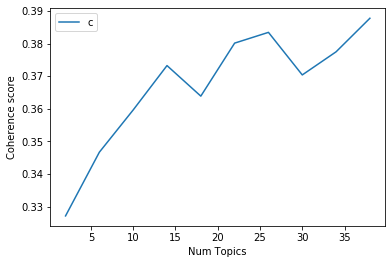

In [155]:
# Show graph
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [156]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3272
Num Topics = 6  has Coherence Value of 0.3467
Num Topics = 10  has Coherence Value of 0.3596
Num Topics = 14  has Coherence Value of 0.3732
Num Topics = 18  has Coherence Value of 0.3639
Num Topics = 22  has Coherence Value of 0.3801
Num Topics = 26  has Coherence Value of 0.3834
Num Topics = 30  has Coherence Value of 0.3704
Num Topics = 34  has Coherence Value of 0.3775
Num Topics = 38  has Coherence Value of 0.3878


In [157]:
# Select the model and print the topics
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(25,
  '0.057*"model" + 0.038*"student" + 0.028*"interaction" + 0.021*"level" + '
  '0.017*"datum" + 0.015*"group" + 0.014*"research" + 0.012*"laboratory" + '
  '0.012*"study" + 0.009*"treatment"'),
 (8,
  '0.032*"student" + 0.016*"protein" + 0.015*"biochemistry" + '
  '0.014*"laboratory" + 0.009*"molecular_biology" + 0.009*"cell" + '
  '0.008*"datum" + 0.008*"enzyme" + 0.008*"fig" + 0.007*"gene"'),
 (6,
  '0.072*"student" + 0.027*"lab" + 0.014*"report" + 0.012*"chemistry" + '
  '0.012*"ﬁrst" + 0.010*"project" + 0.009*"article" + 0.009*"question" + '
  '0.008*"semester" + 0.008*"chemical"'),
 (19,
  '0.050*"student" + 0.017*"change" + 0.014*"water" + 0.012*"temperature" + '
  '0.012*"level" + 0.011*"concept" + 0.009*"response" + 0.009*"gas" + '
  '0.009*"idea" + 0.009*"chemical"'),
 (12,
  '0.024*"lab" + 0.021*"learn" + 0.019*"student" + 0.016*"experience" + '
  '0.014*"work" + 0.013*"group" + 0.012*"interview" + 0.011*"knowledge" + '
  '0.010*"participant" + 0.010*"teaching"'),
 (16,

In [0]:
optimal_model_lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [159]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model_lda, corpus, id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
6     -0.050509  0.133730       1        1  6.663063
11     0.030602 -0.066572       2        1  6.030296
12     0.068890  0.053656       3        1  6.008988
24    -0.020600  0.105751       4        1  5.980645
13     0.003019 -0.007668       5        1  5.913742
...         ...       ...     ...      ...       ...
5      0.045523  0.053125      22        1  2.460439
10    -0.152694  0.042092      23        1  2.459427
2     -0.214260 -0.106467      24        1  2.094125
1     -0.112081  0.140784      25        1  1.970889
7     -0.017344 -0.130605      26        1  1.750647

[26 rows x 5 columns], topic_info=    Category          Freq         Term         Total  loglift  logprob
405  Default  22563.000000   laboratory  22563.000000  30.0000  30.0000
669  Default   7505.000000        skill   7505.000000  29.0000  29.0000
269  Default   9147.000000   experiment   9147.000000  28.0000  28.0000
641  Default  11678.000000      science  11678.000000  27.0000  27.0000
106  Default  15707.000000    chemistry  15707.000000  26.0000  26.0000
..       ...           ...          ...           ...      ...      ...
751  Topic26    116.022724        topic   1705.195558   1.3575  -5.4354
621  Topic26    137.017312       result   6752.717369   0.1476  -5.2691
698  Topic26    186.741337      student  55277.242220  -1.6452  -4.9595
252  Topic26    116.022724  environment   2558.648884   0.9517  -5.4354
405  Topic26    110.497832   laboratory  22563.251165  -1.2739  -5.4842

[2775 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
22536     12  0.917579        aamc
35998     23  1.010669         aas
25294     10  1.017617  abbreviate
25386     11  0.902137    abeyance
1279       1  0.141596     ability
...      ...       ...         ...
2139      14  0.077885         ﬂow
2139      16  0.084376         ﬂow
2139      24  0.623084         ﬂow
27116     13  0.908554  ﬂowability
24268     15  0.913826     ﬂuorous

[6605 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 12, 13, 25, 14, 21, 22, 15, 9, 18, 20, 23, 19, 1, 4, 24, 10, 5, 17, 26, 16, 6, 11, 3, 2, 8])

## Finding the dominant topic in each document

In [161]:
def format_topics_sentences(ldamodel=mallet_lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=mallet_lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.3887,"student, laboratory, biochemistry, protein, da...",© 2002 by The International Union of Biochemis...
1,1,9.0,0.6179,"experiment, chemical, solution, green, sample,...",In the Laboratory A Laboratory Preparation of ...
2,2,7.0,0.5521,"student, learn, virtual, laboratory, simulatio...",Article A Practical Guide to Developing Virtua...
3,3,2.0,0.5507,"student, chemistry, science, laboratory, group...",Res Sci Educ (2018) 48:663–689 DOI 10.1007/s11...
4,4,5.0,0.5709,"student, research, project, lab, report, desig...","Cite This: J. Chem. Educ. 2018, 95, 1520−1525 ..."
5,5,5.0,0.4641,"student, research, project, lab, report, desig...",International Journal for the Scholarship of T...
6,6,5.0,0.5508,"student, research, project, lab, report, desig...",Article pubs.acs.org/jchemeduc Argument-Driven...
7,7,0.0,0.3670,"laboratory, student, chemistry, experiment, la...",248 Assessing Investigative Skill Development ...
8,8,8.0,0.5853,"student, laboratory, biochemistry, protein, da...",Article Better Understanding of Homologous Rec...
9,9,1.0,0.4294,"research, student, experience, learn, science,...",Chemical Education Research Research: Science ...


In [0]:
df_dominant_topic = df_dominant_topic.sort_values(by=['Dominant_Topic'])
df_dominant_topic.head(40)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
278,278,0.0,0.3568,"student, chemistry, science, item, study, scho...","Sustainability 2015, 7, 1798-1818; doi:10.3390..."
303,303,0.0,0.6530,"student, chemistry, science, item, study, scho...",International Journal of Science Education ISS...
305,305,0.0,0.7180,"student, chemistry, science, item, study, scho...",Validity Studies Development and Psychometric ...
167,167,0.0,0.1000,"student, chemistry, science, item, study, scho...","C O G N I T I V E P S Y C H O L O G Y 1 8 , 2 ..."
160,160,0.0,0.4370,"student, chemistry, science, item, study, scho...",Chemistry Education Research and Practice Dyna...
310,310,0.0,0.6453,"student, chemistry, science, item, study, scho...",JOURNAL OF RESEARCH IN SCIENCE TEACHING VOL. 5...
315,315,0.0,0.3892,"student, chemistry, science, item, study, scho...",International Journal of Science Education ISS...
45,45,0.0,0.6710,"student, chemistry, science, item, study, scho...",Australian Journal of Teacher Education The Re...
152,152,0.0,0.7050,"student, chemistry, science, item, study, scho...",Associations between Student Outcomes and Psy...
322,322,0.0,0.4912,"student, chemistry, science, item, study, scho...",Chemistry Education Research and Practice Dyna...


## Finding the most representative documents for each topic

In [0]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

NameError: ignored

## Topic distribution across documents

In [0]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,9.0,"child, game, student, make, class, day, time, ...",35.0,0.0280
1.0,8.0,"engineering, education, refer, financial, engi...",18.0,0.0144
2.0,4.0,"student, study, question, learn, work, knowled...",26.0,0.0208
3.0,31.0,"number, sequence, solution, give, system, meth...",25.0,0.0200
4.0,9.0,"child, game, student, make, class, day, time, ...",40.0,0.0319
...,...,...,...,...
1247.0,7.0,"item, sample, probability, response, test, lev...",NaN,NaN
1248.0,28.0,"function, graph, equation, point, change, curv...",NaN,NaN
1249.0,19.0,"datum, graph, type, statistical, data, level, ...",NaN,NaN
1250.0,13.0,"teacher, school, assessment, curriculum, stand...",NaN,NaN
